In [4]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


Original image


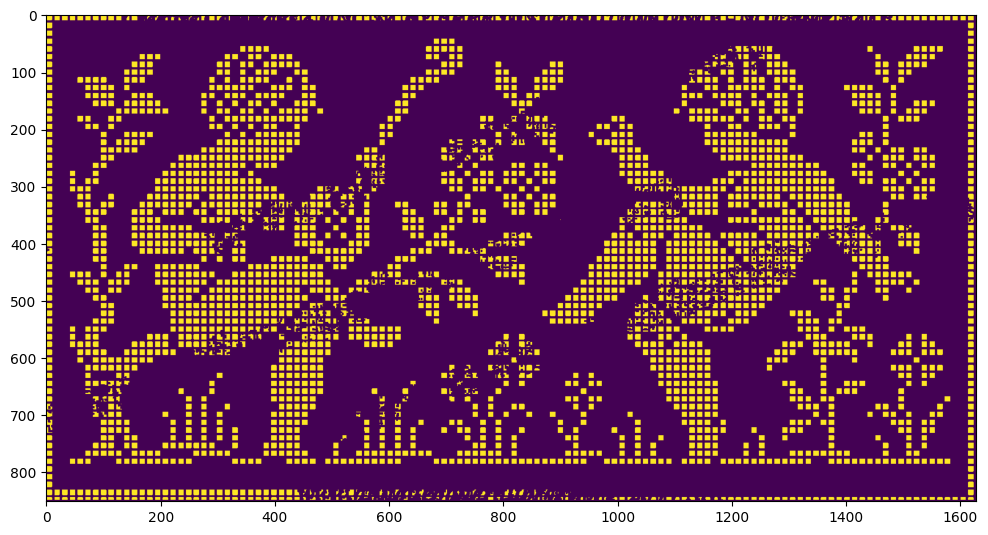

In [20]:
# Load the image
or_image = cv2.imread("pics/two_angels.png")
gray = cv2.cvtColor(or_image, cv2.COLOR_BGR2GRAY)
# All pixels below 200 are set to 0 and the others are set to 255
_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((3, 3), np.uint8))

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig = plt.figure(figsize=(12,12))
print("Original image")
plt.imshow(mask)

In [ ]:
import pandas as pd
filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    # if area is higher than 3000:
    if area > 3000:
        filtered_contours.append(contour)
        # get mean color of contour:
        masked = np.zeros_like(or_image[:, :, 0])  # This mask is used to get the mean color of the specific bead (contour), for kmeans
        cv2.drawContours(masked, [contour], 0, 255, -1)

        B_mean, G_mean, R_mean, _ = cv2.mean(or_image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

fig = plt.figure(figsize=(12,12))
print("Original image")
plt.imshow(mask)

: 